In [ ]:
https://github.com/shubhamwani376/Hello-Real-World-with-ROS-Robot-Operating-System

In [ ]:
# hrwros_msgs/srv/ConvertMetresToFeet.srv

float64 distance_metres     # Request message
---                         # Demarcation
float64 distance_feet       # Response message

In [ ]:
$ rossrv show hrwros_msgs/ConvertMetresToFeet
$ rossrv show hrwros_msgs/ConvertMetresToFeet -r

In [ ]:
$ rosservice list 

In [ ]:
$ source $HOME/hrwros_ws/devel/setup.bash
$ rosrun hrwros_week1 metres_to_feet_server.py

In [ ]:
$ source $HOME/hrwros_ws/devel/setup.bash
$ rosrun hrwros_week1 metres_to_feet_client.py

# **3. ROS Services**

*  The basic idea behind ROS services, that allow for a **"request-response"** communication between ROS nodes. 

## **1. ROS	Services	–	the	basic	idea**

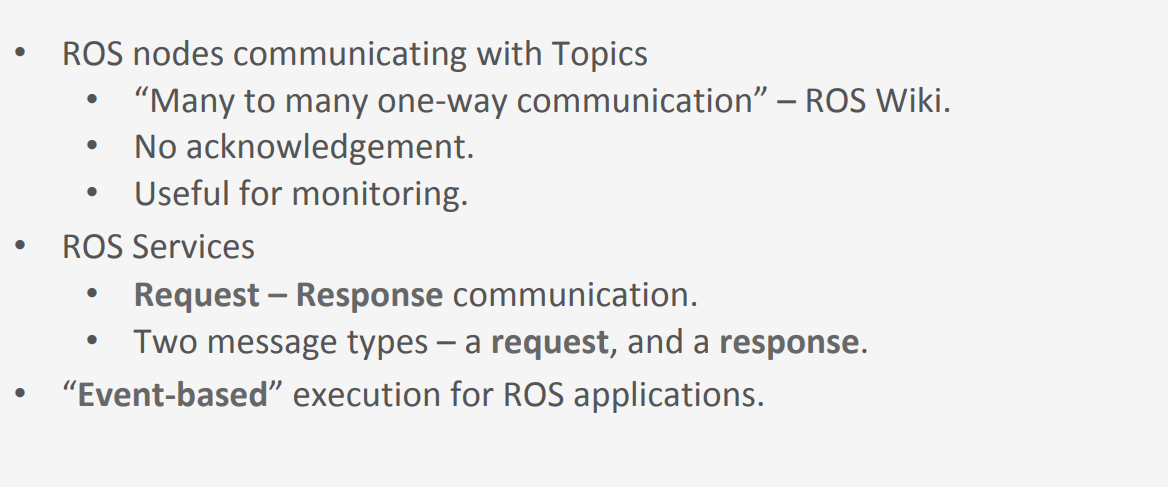

## **2. ROS	Services	–	on	the	filesystem,	utility	cmds**

* ROS	services	are	also	defined	in	the	ROS	messages	package	
 
  * **`hrwros_msgs/srv`**	folder.





* List	all	available	ROS	services

In [ ]:
$ rosservice list 

* call	a	ROS	service	

In [ ]:
$ rosservice call <service_name> <arguments_req> 

## **3. ROS	Services	–	an	example	service	type**

In [ ]:
# hrwros_msgs/srv/ConvertMetresToFeet.srv
		
float64 measurement_metres # Request field
---                        # Demarcation between request and response
float64 measurement_feet   # Response field
bool succes

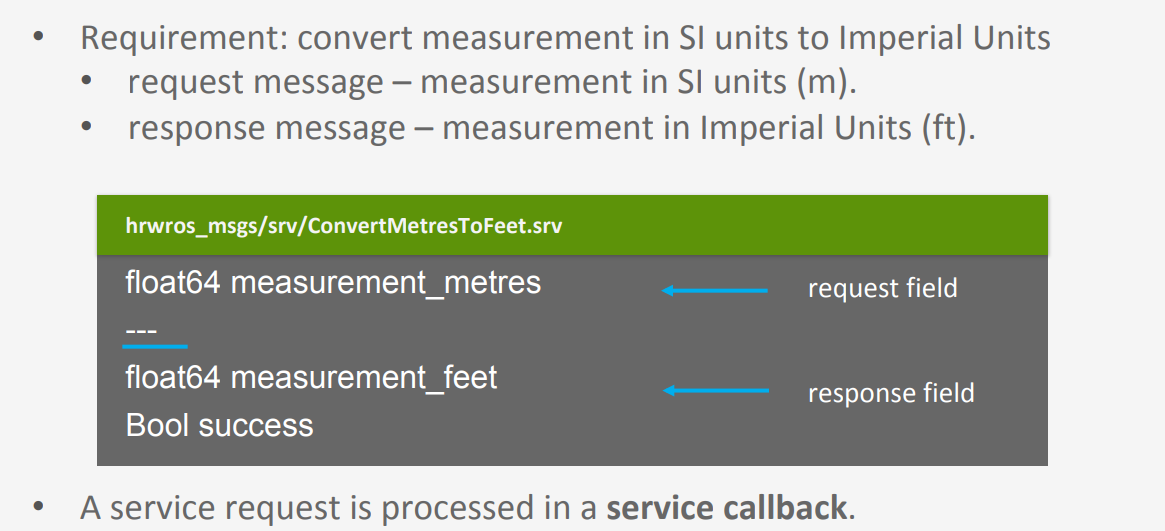

### **A. ROS	Services	–	code	nomenclature**

* A	ROS	Node:	**`service	server`**	**“advertises”**	a	service	
 *  makes	the	service	available	for	other	ROS	nodes.


* A	ROS	Node:	**`service	client`**	**“calls”**	a	service	
 * sends	a	request	message	once	a	service	is	available.	


## **4. ROS	services	–	a	few	properties**

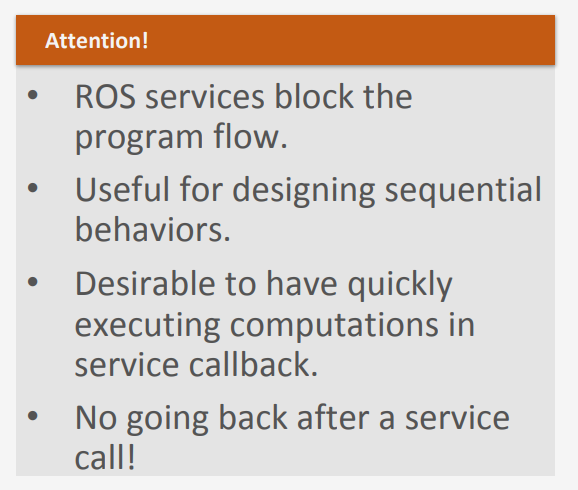

 **`Question`** Which of the following statements are True?

There are three correct answers.

```
A. The waiter is an example of a service client.

B. The waiter is an example of a service provider.

C. The order the waiter gives to the kitchen is a request.

D. The order the waiter gives to the kitchen is a reponse.

E. The kitchen is an example of a response.

F. The kitchen is an example of a service server.
```

**`Answer`**

```
A: This is true, because the waiter asks the kitchen to give him the correct dish (Service Client).

C: This is true, because the waiter requests the correct dish with his order paper (Request).

F: This is true, because the kitchen provides the waiter with the correct dish after the order is placed (Service Server).

```

# **3.1 ROS Services code illustration: Service server part 1**


* Its about creating a ROS service client and server.

* We will start with creating our own service type, and take a look at an example service server created in Python.

## **1. Setting up the service definition files**


* Let's begin by sourcing our setup files, and navigate to our workspace msgs folder:


In [ ]:
$ source $HOME/hrwros_ws/devel/setup.bash
$ roscd hrwros_msgs/

* We define the service in the **`srv/ folder`**.

* So let's create that, and create our **`service`** file:




In [ ]:
$ mkdir srv
$ cd srv
$ touch ConvertMetresToFeet.srv

Remember, 
* we first want the **`request`** message type, 
* then a **`demarcation`** of three dashes, and
* then a **`response`** message type:

In [ ]:
# hrwros_msgs/srv/ConvertMetresToFeet.srv

float64 distance_metres     # Request message: Distance in (m) to be converted to (ft)
---                         # Demarcation
float64 distance_feet       # Response message: Distance in (ft) after conversion
bool success                # Response message: Success or failure of conversion


`To Do `:

 * `CMakeLists.txt `


In [ ]:
## Generate messages in the 'srv' folder
add_service_files(DIRECTORY srv
  FILES
  ConvertMetresToFeet.srv
 )

In [ ]:
$ roscd hrwros_msgs/
$ catkin build 

* We can check if it worked correctly by using the **`rossrv`** command:

In [ ]:
$ rossrv show hrwros_msgs/ConvertMetresToFeet

$ rossrv show hrwros_msgs/ConvertMetresToFeet -r

## **2. Inspecting our service server code**

In [ ]:
 metres_to_feet_server.py

In [ ]:
#!/usr/bin/env python3

# This code has been adapted from the ROS Wiki ROS Service tutorials to the context
# of this course.
# (http://wiki.ros.org/ROS/Tutorials/WritingServiceClient%28python%29)

from hrwros_msgs.srv import ConvertMetresToFeet, ConvertMetresToFeetRequest, ConvertMetresToFeetResponse

import rospy
import numpy as np

_CONVERSION_FACTOR_METRES_TO_FEET = 3.28  # Metres -> Feet conversion factor.

# Service callback function.
def process_service_request(req):

    # 1. Instantiate the response message object.
    res = ConvertMetresToFeetResponse()

    # 2. Perform sanity check. Allow only positive real numbers.
    # Compose the response message accordingly.
    if(req.distance_metres < 0):
        res.success = False
        res.distance_feet = -np.Inf  # Default error value.
    else:
        res.distance_feet = _CONVERSION_FACTOR_METRES_TO_FEET * req.distance_metres
        res.success = True

    # Add a delaying test 10 sec loop. (extra )
    for test_idx in range(0,10):
        rospy.sleep(1)

    # 3. Return the response message.
    return res

def metres_to_feet_server():
    # 1. ROS node for the service server.
    rospy.init_node('metres_to_feet_server', anonymous=False)

    # 2. Create a ROS service type.
    service = rospy.Service('metres_to_feet', ConvertMetresToFeet, process_service_request)

    # 3. Log message about service availability.
    rospy.loginfo('Convert metres to feet service is now available.')
    rospy.spin()


if __name__ == "__main__":
    metres_to_feet_server()

# **3.2 ROS Services code: Service client part 2**


*  In the last section, we created our own service type.

*  In this part, we will look at the example service client, and actually run the two examples.


## **1. Inspecting our service client code** 

* looking at the service client example: **`metres_to_feet_client.py`**




In [ ]:
#!/usr/bin/env python3

# (http://wiki.ros.org/ROS/Tutorials/WritingServiceClient%28python%29)

import sys
import rospy

from hrwros_msgs.srv import ConvertMetresToFeet, ConvertMetresToFeetRequest, ConvertMetresToFeetResponse

def metres_to_feet_client(x):
    # 1. First wait for the service to become available.
    rospy.loginfo("Waiting for service...")
    rospy.wait_for_service('metres_to_feet')
    try:
        # 2. Create a service proxy.
        metres_to_feet = rospy.ServiceProxy('metres_to_feet', ConvertMetresToFeet)

        # 3. Call the service here.
        service_response = metres_to_feet(x)

        # You will now see the client will only print out every 10 seconds
        print("I only got here AFTER the service call was completed!")

        # 4. Return the response to the calling function.
        return service_response

    except rospy.ServiceException as e:
        print("Service call failed: %s", e)


if __name__ == "__main__":

    # 1. Initialize the client ROS node.
    rospy.init_node("metres_to_feet_client", anonymous=False)

    # 2. The distance to be converted to feet.
    dist_metres = 0.25

    rospy.loginfo("Requesting conversion of %4.2f m to feet" % (dist_metres))

    # 3. Call the service client function.
    service_response = metres_to_feet_client(dist_metres)

    # 4. Process the service response and display log messages accordingly.
    if(not service_response.success):
        rospy.logerr("Conversion unsuccessful! Requested distance in metres should be a positive real number.")
    else:
        rospy.loginfo("%4.2f m = %4.2f feet"%(dist_metres, service_response.distance_feet))
        rospy.loginfo("Conversion successful!")

## **2. Using the service server & client**


* Source our setup files and run our **`server`** 

In [ ]:
$ source $HOME/hrwros_ws/devel/setup.bash

$ rosrun hrwros_week1 metres_to_feet_server.py

* **`The service is now available`**. 

* Time to also start the ROS **`client`** in a separate terminal:


In [ ]:
$ source $HOME/hrwros_ws/devel/setup.bash

$ rosrun hrwros_week1 metres_to_feet_client.py

In [ ]:
HRWROS:~/new_ros_ws> rosservice list 



```
/metres_to_feet
/metres_to_feet_server/get_loggers
/metres_to_feet_server/set_logger_level
/rosout/get_loggers
/rosout/set_logger_level
```

